In [1]:
import pandas as pd
import numpy as np
import os
import json
import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
folder_path = "../ECE219_tweet_data/"
files= os.listdir(folder_path)
print(files)

['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']


In [3]:
data = {}
for file_ in files: 
#     data = {}
    key = file_[7:-4]
    with open(folder_path + file_, encoding="utf8") as f:
        print("Starting for",key)
        for line in tqdm(f):
            try:
                tweet = json.loads(line,strict=False)['tweet']['user']
                data.setdefault('profile_use_background_image',[]).append(tweet['profile_use_background_image'])
                data.setdefault('verified',[]).append(tweet['verified'])
                data.setdefault('location',[]).append(tweet['location'])
                data.setdefault('statuses_count',[]).append(tweet['statuses_count'])
                data.setdefault('friends_count',[]).append(tweet['friends_count'])
                data.setdefault('favourites_count',[]).append(tweet['favourites_count'])
                data.setdefault('followers_count',[]).append(tweet['followers_count'])
            except Exception as e:
                print(key,e)
    print("done for",key)
users = pd.DataFrame.from_dict(data)


1112it [00:00, 11118.87it/s]

Starting for #gohawks


169122it [00:13, 12663.17it/s]


done for #gohawks


2479it [00:00, 12387.84it/s]

Starting for #gopatriots


23511it [00:01, 13115.38it/s]


done for #gopatriots


1980it [00:00, 9783.75it/s]

Starting for #nfl


233022it [00:18, 12634.52it/s]


done for #nfl


2066it [00:00, 10580.55it/s]

Starting for #patriots


440621it [00:35, 12529.31it/s]


done for #patriots


1383it [00:00, 13825.23it/s]

Starting for #sb49


743649it [01:07, 10951.79it/s]


done for #sb49


1106it [00:00, 11050.03it/s]

Starting for #superbowl


1213813it [01:40, 12066.79it/s]


done for #superbowl


In [4]:
users

,profile_use_background_image,verified,location,statuses_count,friends_count,favourites_count,followers_count
0,True,False,Ontario,12477,2025,9490,2318
1,True,False,"Redmond, WA",156,29,2,12
2,True,False,Seattle,3897,1455,931,1998
3,True,False,,82505,17,0,811
4,True,False,"Buffalo, Wyoming",3747,918,780,595
5,True,False,"McChord AFB, WA",32669,858,15049,432
6,True,False,Washington state,1758,349,2177,254
7,True,False,#Seahawks #Mariners,561,201,14383,310
8,True,False,Pacific Northwest - USA,715,78,521,52
9,True,False,The Halls of Valhalla,4835,1565,5884,1612


In [5]:
users.drop_duplicates(inplace=True)
len(users)

2322919

In [6]:
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures

In [7]:
le = LabelEncoder()
users['location'] = le.fit_transform(users['location'])

In [8]:
users = users[users.location != 0]

In [9]:
len(users)

1566006

In [10]:
y = users['followers_count']
X = users.drop(['followers_count'],axis=1)

In [11]:
X.columns

Index(['profile_use_background_image', 'verified', 'location',
       'statuses_count', 'friends_count', 'favourites_count'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_train,X_val, y_train , y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
validation_score = []
min_score = 999999999999
for i in range(5):
    poly = PolynomialFeatures(i)
    X_train_poly = poly.fit_transform(X_train)
    reg = LinearRegression().fit(X_train_poly, y_train)
    validation_score = mean_squared_error(y_val,reg.predict(poly.transform(X_val)))
    if validation_score<min_score:
        min_score = validation_score
        best_model = (i,reg)
    print("Completed for",i)

Completed for 0
Completed for 1
Completed for 2
Completed for 3
Completed for 4


In [14]:
print("Validation RMSE",np.sqrt(min_score))
print("Best Polynomial Feature",best_model[0])
print("Test MSE",np.sqrt(mean_squared_error(y_test,best_model[1].predict(PolynomialFeatures(best_model[0]).fit_transform(X_test)))))

Validation RMSE 151518.14534382615
Best Polynomial Feature 2
Test MSE 137439.18534455352


In [15]:
print("Min follower count",y.min())
print("Max follower count",y.max())
print("Mean follower count",y.mean())
print("Std deviation of follower count",y.std())

Min follower count 0
Max follower count 40623398
Mean follower count 9204.20654518565
Std deviation of follower count 149588.73239317065


In [17]:
predicted = best_model[1].predict(PolynomialFeatures(best_model[0]).fit_transform(X_test))

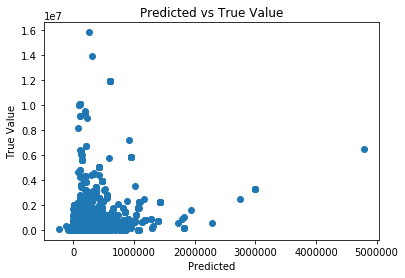

In [20]:
plt.title('Predicted vs True Value')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.scatter(predicted, y_test)

# Conclusion 
We predicted follower count using various user's data using linear regression.
Steps:
1. Read users data from each tweet from all files
2. Remove duplicate users (As same user might have tweeted multiple time)
3. Standardized the data 
4. Split data into train, validation and test
5. Found the best polynomial feature model with linear regression
6. Predicted the follower on the test set
7. Reported RMSE Score for the best model found

## RMSE under 1 standard deviation

We can add more features(Description, types of followers) to help us improve our model